In [ ]:
# Functions 
if you do not create a function, you have to recreate the code every time you want to use it . 
which is not useful. 
We want to have a function that we can repackage we used to repackage the code
Build a function allows us to resue the code. 

In [10]:
# two ways to create lists 
lst1 = {1,2,3,4,5}
lst2 = {i*2 for i in range(1,6)} # what if we have another list 2 
total = 0 
for val in lst1:
    total = total + val
    print("val:",val, "total:",total)
print("total of values from list1:",total)
print("lst2:",lst2)

# if I wanted to caculate that if I did not build a function, I have to do like this. 

total = 0
for val in lst2:
    total = total + val 
    print("val:",val, "total:",total)
print("total of values from list1:",total)

# what if we have 100 lists to go through, this would not be very convenient 
# to type out all this code every single time 

# let us create a function for toal here to make our life easier. 

val: 1 total: 1
val: 2 total: 3
val: 3 total: 6
val: 4 total: 10
val: 5 total: 15
total of values from list1: 15
lst2: {2, 4, 6, 8, 10}
val: 2 total: 2
val: 4 total: 6
val: 6 total: 12
val: 8 total: 20
val: 10 total: 30
total of values from list1: 30


In [ ]:
Create a function for total to make our lives easier. 
Every time we build a function using python, we start by calling this def 
and then you name the function 


In [7]:
# def means to define a function whose name is total, input is list_obj, output is the last line which means total 
def total(list_obj):
    total = 0
    n = len(list_obj)
    #for i in range(n):
    #    val = list_obj[i]
    #    total += val
    for val in list_obj:
        #total += val
        total = total + val
    print("total of values from lst1:",total(lst1))
    # return outputs whatever value or variable is after return
    return total


In [5]:
def total(list_obj):
    total = 0
    n = len(list_obj)
    for i in range(n):
        total += list_obj[i]
    return total

def mean(list_obj):
    n = len(list_obj)
    mean_ = total(list_obj) / n
    return mean_

def median(list_obj):
    n = len(list_obj)
    list_obj = sorted(list_obj)
    #lists of even length divided by 2 have reminder 0
    if n % 2 != 0:
        #list length is odd
        middle_index = int((n - 1) / 2)
        median_ = list_obj[middle_index]
    else:
        upper_middle_index = int(n / 2)
        lower_middle_index = upper_middle_index - 1
        # pass slice with two middle values to mean()
        median_ = mean(list_obj[lower_middle_index : upper_middle_index + 1])
        
    return median_

def mode(list_obj):
    # use to record value(s) that appear most times
    max_count = 0
    # use to count occurrences of each value in list
    counter_dict = {}
    for value in list_obj:
        # count for each value should start at 0
        counter_dict[value] = 0
    for value in list_obj:
        # add on to the count of the value for each occurrence in list_obj
        counter_dict[value] += 1
    # make a list of the value (not keys) from the dictionary
    count_list = list(counter_dict.values())
    # and find the max value
    max_count = max(count_list)
    # use a generator to make a list of the values (keys) whose number of 
    # occurences in the list match max_count
    mode_ = [key for key in counter_dict if counter_dict[key] == max_count]
    
    return mode_

def variance(list_obj, sample = False):
    # popvar(list) = sum((xi - list_mean)**2) / n for all xi in list
    # save mean value of list
    list_mean = mean(list_obj)
    # use n to calculate average of sum squared diffs
    n = len(list_obj)
    # create value we can add squared diffs to
    sum_sq_diff = 0
    for val in list_obj:
        # adds each squared diff to sum_sq_diff
        sum_sq_diff += (val - list_mean) ** 2
    if sample == False:
        # normalize result by dividing by n
        variance_ = sum_sq_diff / n
    else:
        # for samples, normalize by dividing by (n-1)
        variance_ = sum_sq_diff / (n - 1)
    
    return variance_

def SD(list_obj, sample = False):
    # Standard deviation is the square root of variance
    SD_ = variance(list_obj, sample) ** (1/2)
    
    return SD_

def covariance(list_obj1, list_obj2, sample = False):
    # determine the mean of each list
    mean1 = mean(list_obj1)
    mean2 = mean(list_obj2)
    # instantiate a variable holding the value of 0; this will be used to 
    # sum the values generated in the for loop below
    cov = 0
    n1 = len(list_obj1)
    n2 = len(list_obj2)
    # check list lengths are equal
    if n1 == n2:
        n = n1
        # sum the product of the differences
        for i in range(n1):
            cov += (list_obj1[i] - mean1) * (list_obj2[i] - mean2)
        if sample == False:
            cov = cov / n
        # account for sample by dividing by one less than number of elements in list
        else:
            cov = cov / (n - 1)
        # return covariance
        return cov
    else:
        print("List lengths are not equal")
        print("List1:", n1)
        print("List2:", n2)
    

def correlation(list_obj1, list_obj2):
    # corr(x,y) = cov(x, y) / (SD(x) * SD(y))
    cov = covariance(list_obj1, list_obj2)
    SD1 = SD(list_obj1)
    SD2 = SD(list_obj2)
    corr = cov / (SD1 * SD2)
    return corr

def skewness(list_obj, sample = False):
    mean_ = mean(list_obj)
    SD_ = SD(list_obj, sample)
    skew = 0
    n = len(list_obj)
    for val in list_obj:
        skew += (val - mean_) ** 3
    skew = skew / (n * SD_ **3) if not sample else n * skew / ((n - 1)*(n - 2) * SD_ ** 3)
        
    return skew

def kurtosis(list_obj, sample = False):
    mean_ = mean(list_obj)
    kurt = 0
    SD_ = SD(list_obj, sample)
    n = len(list_obj)
    for val in list_obj:
        kurt += (val - mean_) ** 4
    kurt = kurt / (n * SD_ ** 4) if sample == False else  n * (n + 1) * kurt / \
    ( (n - 1) * (n - 2) *(n - 3) * (SD_ ** 4)) - (3 *(n - 1) ** 2) / ((n - 2) * (n - 3))
    
    return kurt

lst1 = [1,2,3,4,5]
lst2 = [i*2 for i in range(1,6)]
lst3 = [4,4,5,6,7,6,5,4]
total1 = total(lst1)
total2 = total(lst2)
total3 = total(lst3)
print("total of values from list1:", total1)
print("total of values from list2:", total2)
print("total of values from list3:", total3)

variance1 = variance(lst1)
variance2 = variance(lst2)
variance3 = variance(lst3)
print("variance of lst1:", variance1)
print("variance of lst2:", variance2)
print("variance of lst3:", variance3)

SD1 = SD(lst1)
SD2 = SD(lst2)
SD3 = SD(lst3)
print("standard deviation of lst1", SD1)
print("standard deviation of lst2", SD2)
print("standard deviation of lst3", SD3)

cov12 = correlation(lst1, lst2)
cov13 = covariance(lst1, lst3)
print("covariance of lst1 and last2", cov12)

corr12 = correlation(lst1, lst2)
print("correlation of lst1 and lst2:", corr12)

skew1 = skewness(lst1)
skew2 = skewness(lst2)

print("skewness list1:", skew1)
print("skewnness list2", skew2)

kurt1 = kurtosis(lst1)
kurt2 = kurtosis(lst2)

print("kurtosis lst1", kurt1)
print("kurtosis lst2", kurt2)

total of values from list1: 15
total of values from list2: 30
total of values from list3: 41
variance of lst1: 2.0
variance of lst2: 8.0
variance of lst3: 1.109375
standard deviation of lst1 1.4142135623730951
standard deviation of lst2 2.8284271247461903
standard deviation of lst3 1.0532687216470449
List lengths are not equal
List1: 5
List2: 8
covariance of lst1 and last2 0.9999999999999998
correlation of lst1 and lst2: 0.9999999999999998
skewness list1: 0.0
skewnness list2 0.0
kurtosis lst1 1.6999999999999997
kurtosis lst2 1.6999999999999997


Now let's create a function that gathers statistics for each variable in a dataframe.

In [2]:
# we create an empty dictionary, this function takes a data frame and it is going to calculate statistics for every variable in the dataframe 
def gather_statistics(df, sample = False):  # dr means dataframe, one set of data 
    dct = {key:{} for key in df} # we create a dictionary and pass a dataframe to the dictionary 
      # column name is key 
        # column data is val 
        #    for df.item()
    
    # then we are going to run through the dataframe 
    for key, val in df.items(): # for every variable in the data frame, we are going to create an entry
        # both one key and one val are called entry 
        # and another dictionary that is going to end up holding each statistics for that variable. 
       
    # drop any missing observations from dataframe because useless
        val = val.dropna(axis=0)
         # Calculate each statistics for each variable, the data which is the val, the variable name is the key. 
        # the variable name is the key and the column of data is the val. 
        
        # two levels of maps, first level ie is list 1 and list 2; 
        # the second level of map is mean, median ,variance of those two lists 
        dct[key]["mean"] = round(mean(val),3)
        dct[key]["median"] = round(median(val),3)
        # skip mode. . .         dct[key]["mode"] = mode(val)
        dct[key]["variance"] = round(variance(val, sample),3)
        dct[key]["S.D."] = round(SD(val, sample) ,3)
        dct[key]["skewness"] = round(skewness(val, sample),3)
        dct[key]["kurtosis"] = round(kurtosis(val, sample),3)
        
        # We have created a dictionary with different variables, but every variable has the same statistics, that means we can create a dataframe 
    stats_df = pd.DataFrame(dct)  
    return stats_df

For the next exercise, you will need to install pandas_datareader using:
* pip install pandas-datareader 

If you are not an administrator, you may use the command

* pip install pandas-datareader --user

Now that we have built our statistical functions, we will import daily stock data using pandas_datareader. Let's import some of the major tech stocks.

We need to install a library for downloading data and that library is called the panda data reader 
C:/users/Shane pip install pandas-datareader 

In [ ]:
# how to scrape the data 
# we import pandas data reader 
# we import pandas becasue we are using pandas when I import pandas data reader as web 

import pandas as pd
import pandas_datareader.data as web
import datetime

# data is format (yyyy, mm, dd)
start = datetime.datetime(2012, 1 , 1)
end = datetime.datetime.today()

# We save the data in a dictionary 
data_dict = {}

# we choose our stocks whichever stocks we think are appropriate. 
stocks = ["MSFT", "AAPL", "FB", "TSLA"]
for name in stocks:
    # web.DataReader(stockname, source, start_date,end_date)
    data_dict[name] = web.DataReader(name, 'yahoo', start, end)
# this is the code that you can always reference, if you want to download other stock data. 

In [11]:
data_dict["MSFT"]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,26.959999,26.389999,26.549999,26.770000,64731500.0,21.906679
2012-01-04,27.469999,26.780001,26.820000,27.400000,80516100.0,22.422224
2012-01-05,27.730000,27.290001,27.379999,27.680000,56081400.0,22.651352
2012-01-06,28.190001,27.530001,27.530001,28.110001,99455500.0,23.003237
2012-01-09,28.100000,27.719999,28.049999,27.740000,59706800.0,22.700455
...,...,...,...,...,...,...
2020-10-06,210.179993,204.820007,208.820007,205.910004,28554300.0,205.910004
2020-10-07,210.110001,206.720001,207.059998,209.830002,25681100.0,209.830002
2020-10-08,211.190002,208.320007,210.509995,210.580002,19925800.0,210.580002


Now save the closing price data for all four stocks in a single dataframe.

In [19]:
# we create a new dataframe by concatting 
# concat: to link together in a series or chain
# each of the close values is going to make a list. 
# of all the close values columns in the dictionary, we are going to take the keys and each val references a key. 

# make a list of the close data for each stock 

list_close_datas = [val["Close"] for val in data_dict.values()]

# the list of data will be aligned with keys. 

data_keys = data.dict.keys()

# this is a list of all the close data for each for each company 
# close_data = pd.concat([val["Close"] for val in data_dict.values()], keys = data_dict.keys(), axis = 1)
# axis= 1 concatenates lists horizontally, otherwise, there will be concatenate them vertically and then we will have a really useless long list 

close_data = pd.concat( list_close_datas, keys = data_dict.keys(),axis = 1)
close_data 
# this code will literally just consolidate all the close data. 

NameError: name 'data' is not defined

In [23]:
# maybe we need a separate dataframe for volumns as well

list_close_datas = [val["Close"] for val in data_dict.values()]


data_keys = data.dict.keys()


close_data = pd.concat( list_close_datas, keys = data_dict.keys(),axis = 1)

list_volume_datas = [val("Volume") for val in data_dict, values()]
list_volumn = pd.concat(list_Volume_datas, keys = data_keys, axis = 1)
volumn_data 


SyntaxError: invalid syntax (<ipython-input-23-0f51fccd3b88>, line 11)

Let's plot the data for each stock in a single graph.

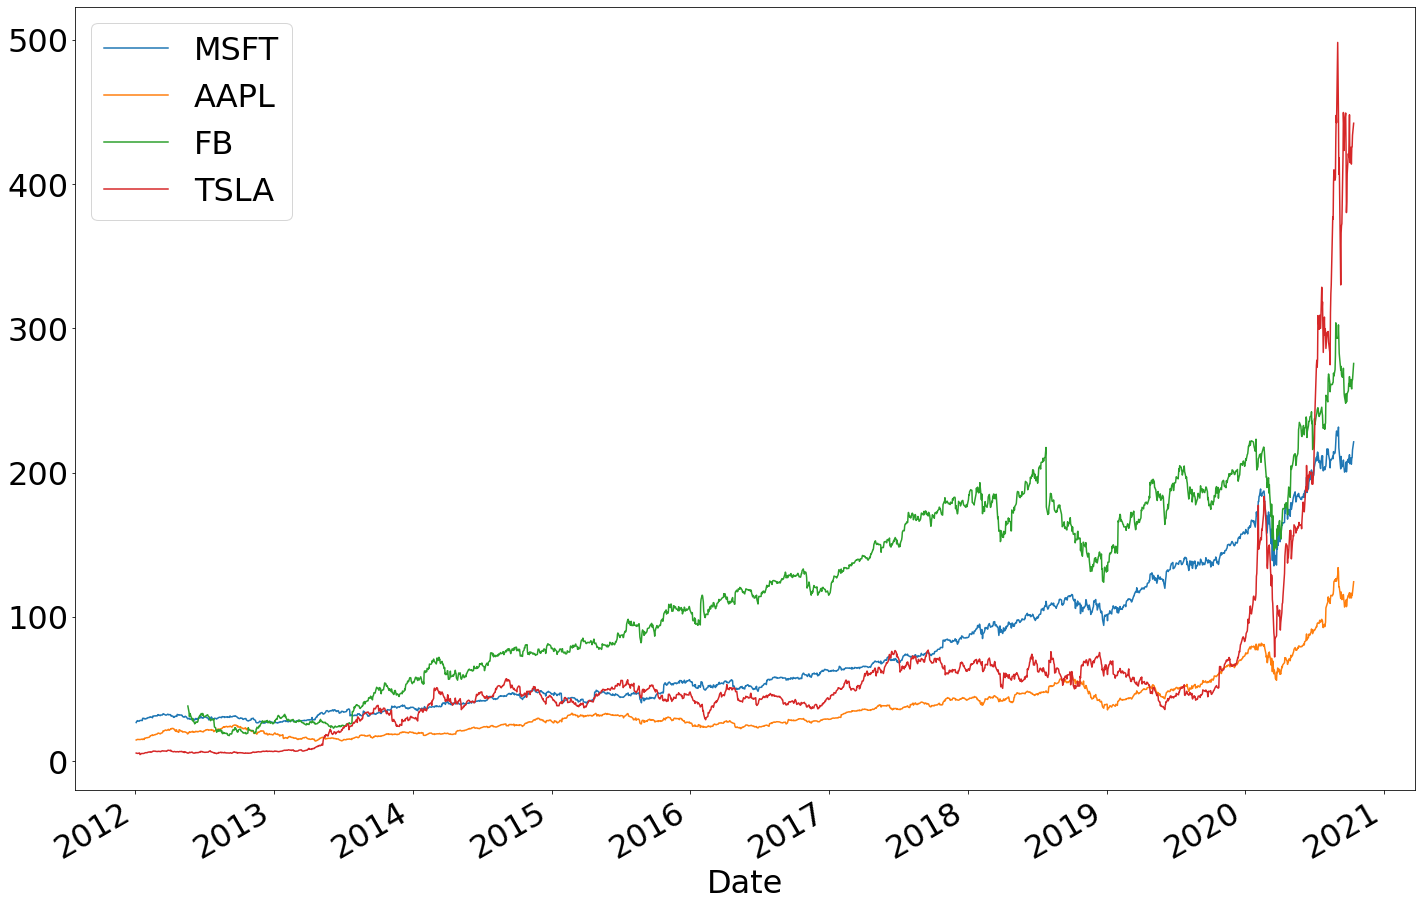

In [25]:
# this is our visuallization library 
# keep this mind about three important commands
# one is import pandas as pd
# third one is import matplotlib as plt 
# second one is import
import matplotlib.pyplot as plt

# set default font size
plt.rcParams.update({'font.size': 32})


##### these two commands are all you really need to plot data
# create a new figure to use for plotting 
fig, ax = plt.subplots(figsize = (24,16))

# we want to plot all the columns in the dataframe so we don't even have to specify which columns. 
close_data.plot.line(ax = ax, legend = True)

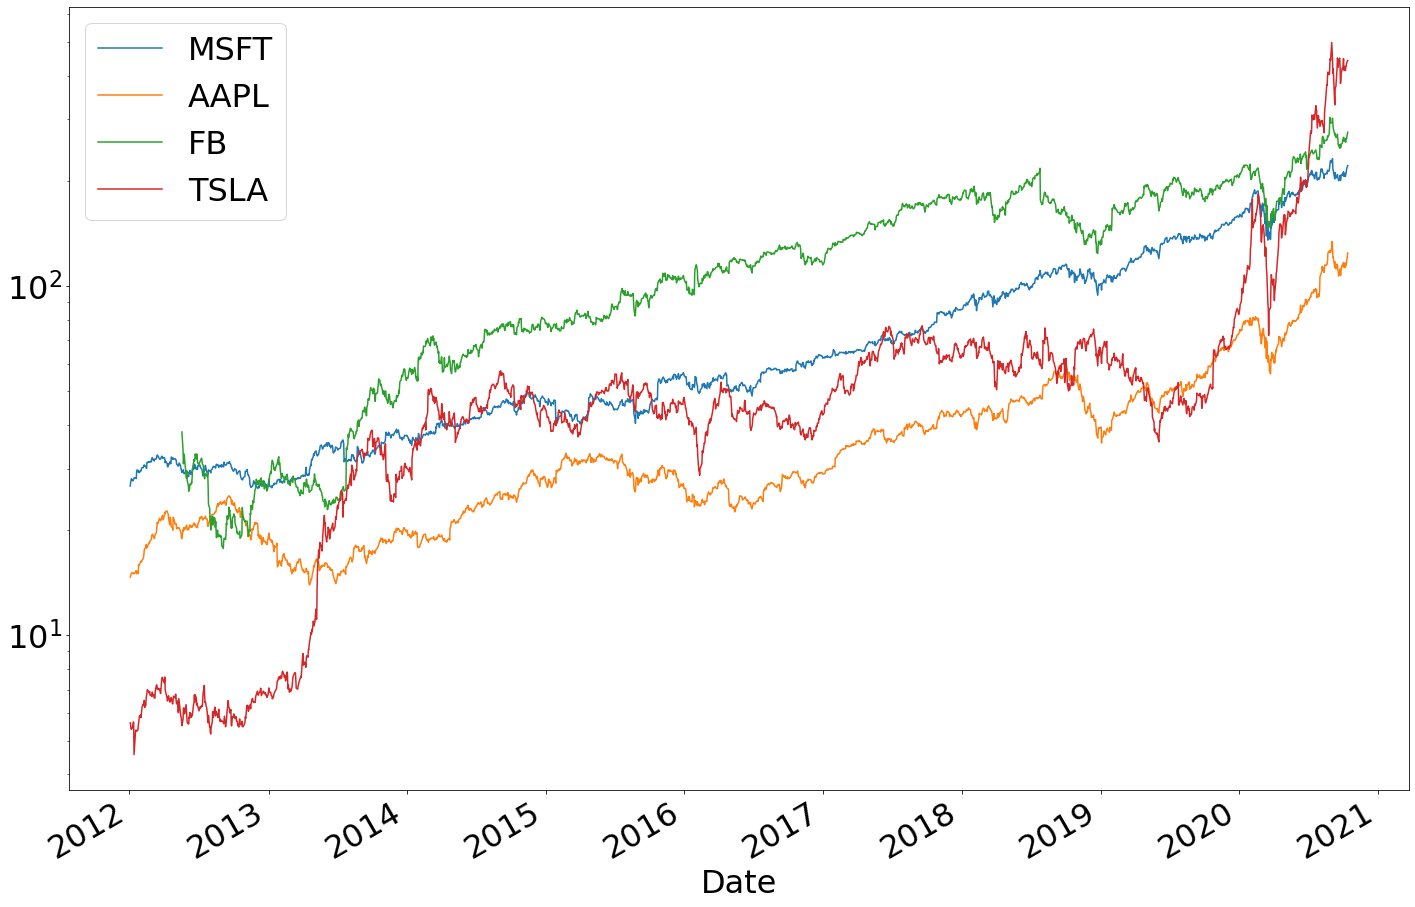

In [26]:
# this is our visuallization library 
# keep this mind about three important commands
# one is import pandas as pd
# third one is import matplotlib as plt 
# second one is import
import matplotlib.pyplot as plt

# set default font size
plt.rcParams.update({'font.size': 32})

##### these two commands are all you really need to plot data
# create a new figure to use for plotting 
fig, ax = plt.subplots(figsize = (24,16))

# we want to plot all the columns in the dataframe so we don't even have to specify which columns. 
close_data.plot.line(ax = ax, legend = True)


# set y axis as logged to view changes in proportional terms
# instead of absolute terms
ax.set_yscale("log")


[1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]
[0.1, 1, 10, 100, 1000, 10000]


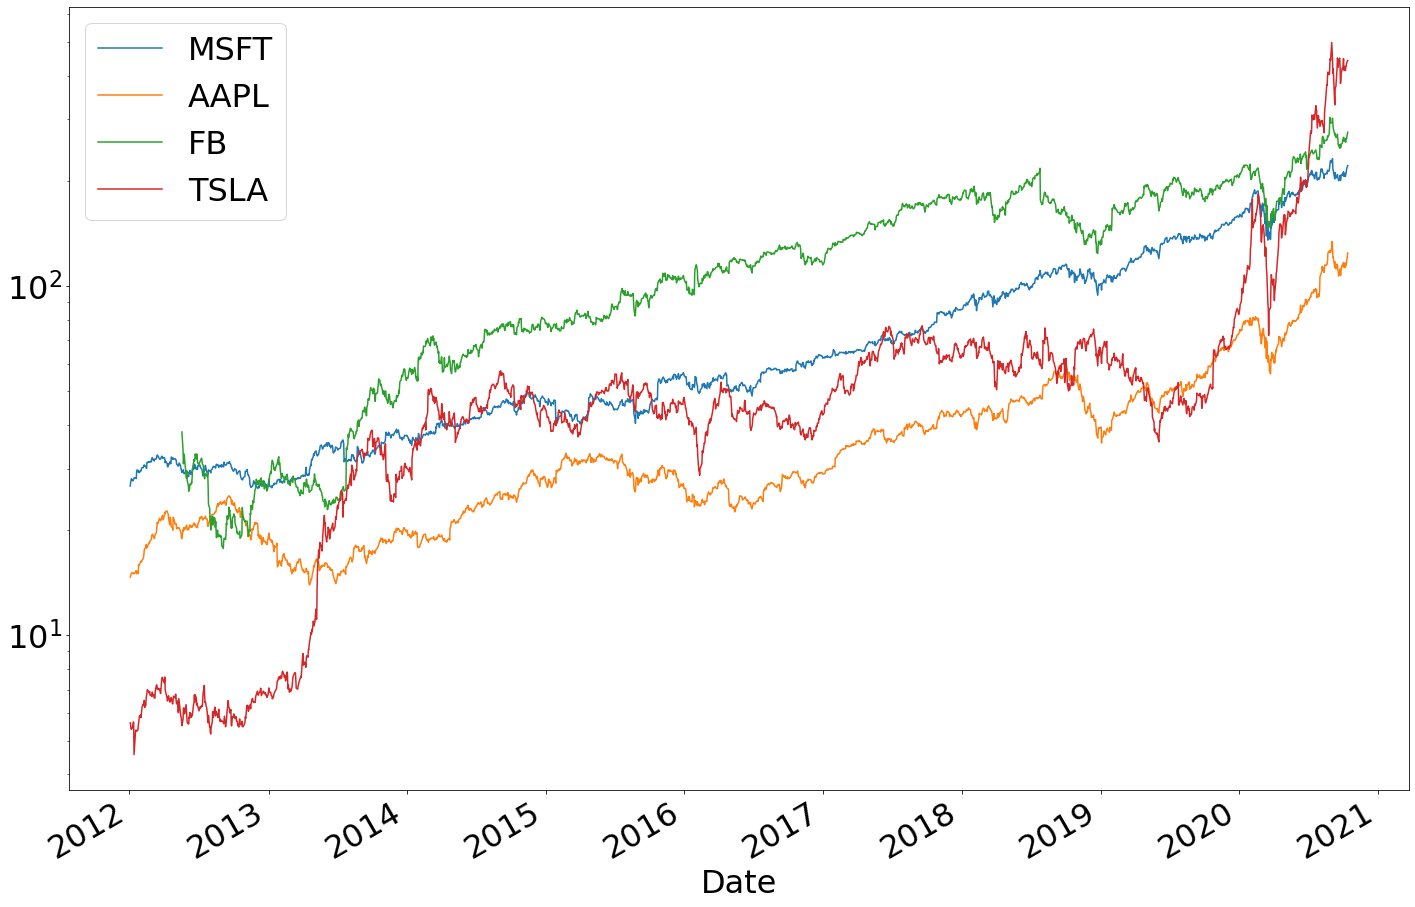

In [27]:
# this is our visuallization library 
# keep this mind about three important commands
# one is import pandas as pd
# third one is import matplotlib as plt 
# second one is import
import matplotlib.pyplot as plt

# set default font size
plt.rcParams.update({'font.size': 32})

##### these two commands are all you really need to plot data
# create a new figure to use for plotting 
fig, ax = plt.subplots(figsize = (24,16))

# we want to plot all the columns in the dataframe so we don't even have to specify which columns. 
close_data.plot.line(ax = ax, legend = True)


# set y axis as logged to view changes in proportional terms
# instead of absolute terms
ax.set_yscale("log")

# reset y labels to integer from scientific notation
# ax.set_yticks() generates a list of the axis values for the y axis. 
y_vals = ax.get_yticks()
reformat_values = [int(y) if y >= 1 else round(y,1) for y in y_vals]
# set axis labels with reformat_values instead of existing values 
ax.set-yticklables(reformat_values)

In [ ]:
As you can see, tech stocks have been generally increasing across the decade. Kudos to you if you bought TSLA stock before 2014!

Let's transform the data so that we observe the distribution of the daily percent change of stock prices. If the efficient markets hypothesis is correct in its strong form, the daily rate of change of prices should be normally distributed. We will see that, over the long-run, the hypothesis is true, but over the short-run, we may find that the tails of distributions are relatively fat.

In [6]:
# pct_change give percent as decimal. Transform to percent as whole number
price_change_data = close_data.pct_change() * 100

As with the untransformed data, it will be useful to view the transformed data in a timeseries plot. Notice how the data reflect periods of tremendous  volatility with other periods reflecting relative stability.

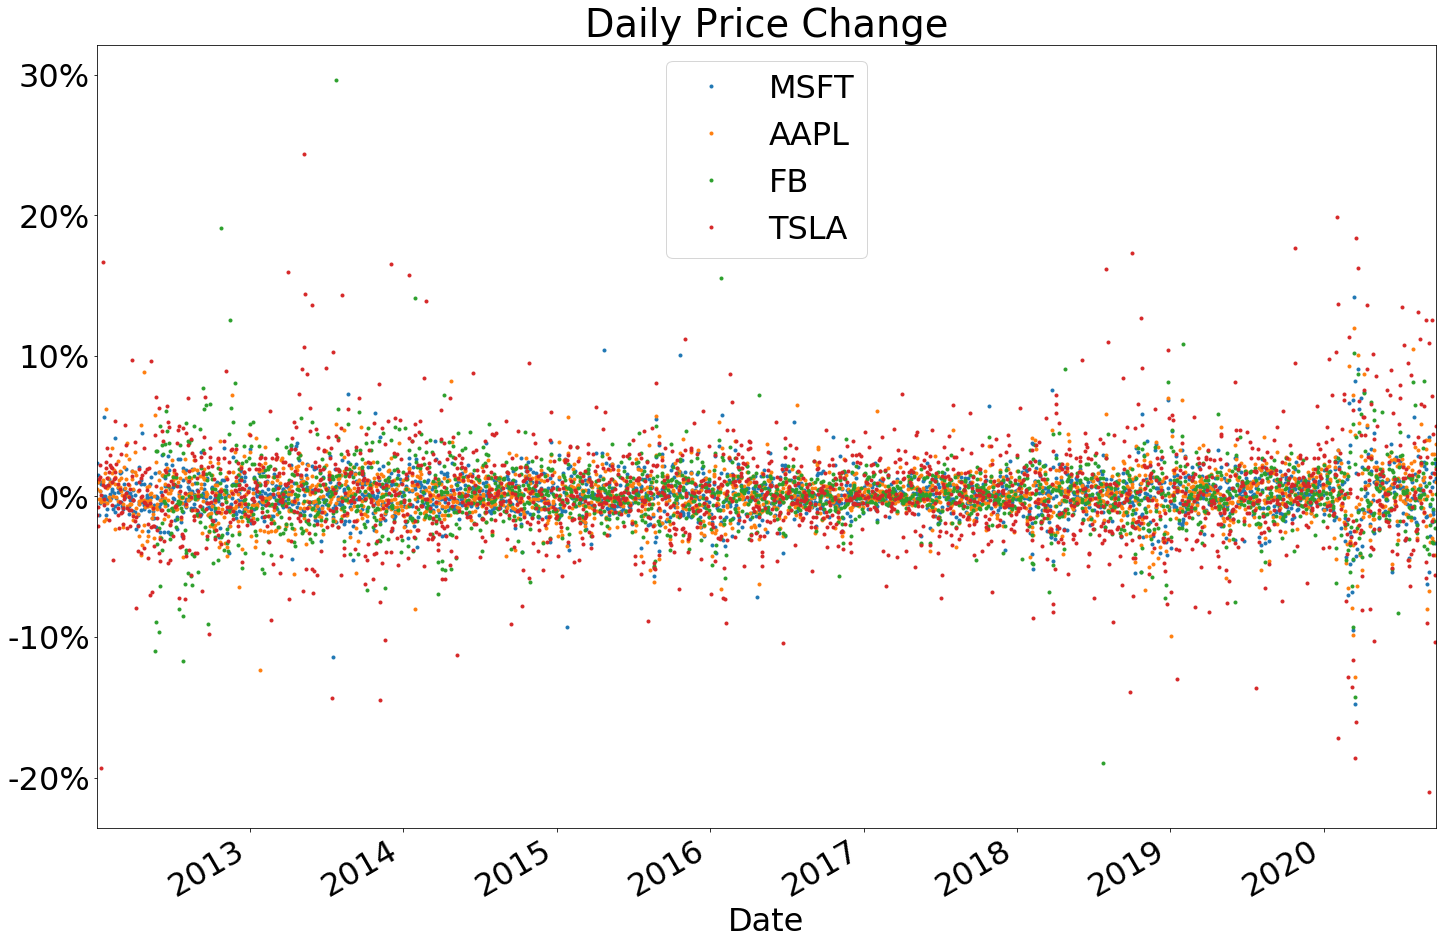

In [7]:
# set default font size
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    # plot as scatter plot over time by setting marker to "." and ls to "" (blank)
    #price_change_data[key].scatter()
    price_change_data[key].plot.line(marker = ".", ls="", ax = ax)
plt.legend()
plt.title("Daily Price Change")
# set y labels to integer include %
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])    

plt.show()
plt.close()

It will be helpful to plot the distribution of daily price changes for each stock. After building the initial plot, we will include statistics describing the mean, median, mode, standard deviation, skewness, and kurtosis.

First, let's prepare these statistics in a dataframe using the function we created at the beggining of the lesson.



In [8]:
stats_df = gather_statistics(price_change_data, sample = True)
stats_df

,MSFT,AAPL,FB,TSLA
S.D.,1.636,1.798,2.358,3.513
kurtosis,11.240,7.032,19.358,6.508
mean,0.107,0.109,0.118,0.256
median,0.069,0.089,0.107,0.122
skewness,0.060,-0.143,0.987,0.403
variance,2.675,3.234,5.561,12.344


Next, we will build a histogram using pandas and matplotlib. Luckily, pandas includes a method for building histograms.

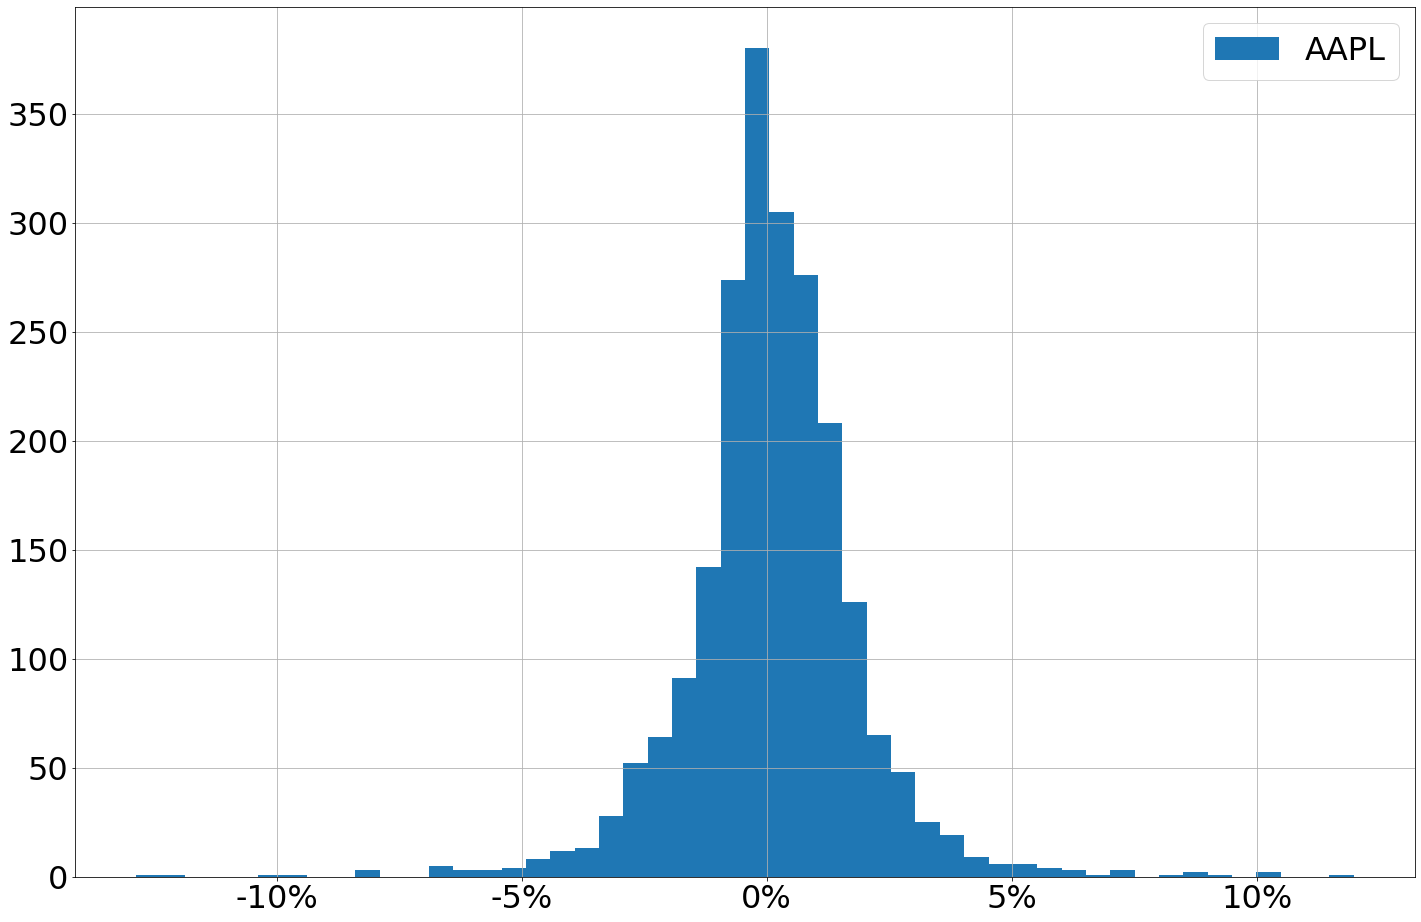

In [10]:
fig, ax = plt.subplots(figsize = (24, 16))
price_change_data["AAPL"].hist(bins = 50, label = "AAPL")
# set horizontal axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    
plt.legend()

Instead of viewing the number of observations for each bin on the y-axis, transform the histogram to a distribution using *density = "true"*. We will also transform the decimal into whole number percentages.

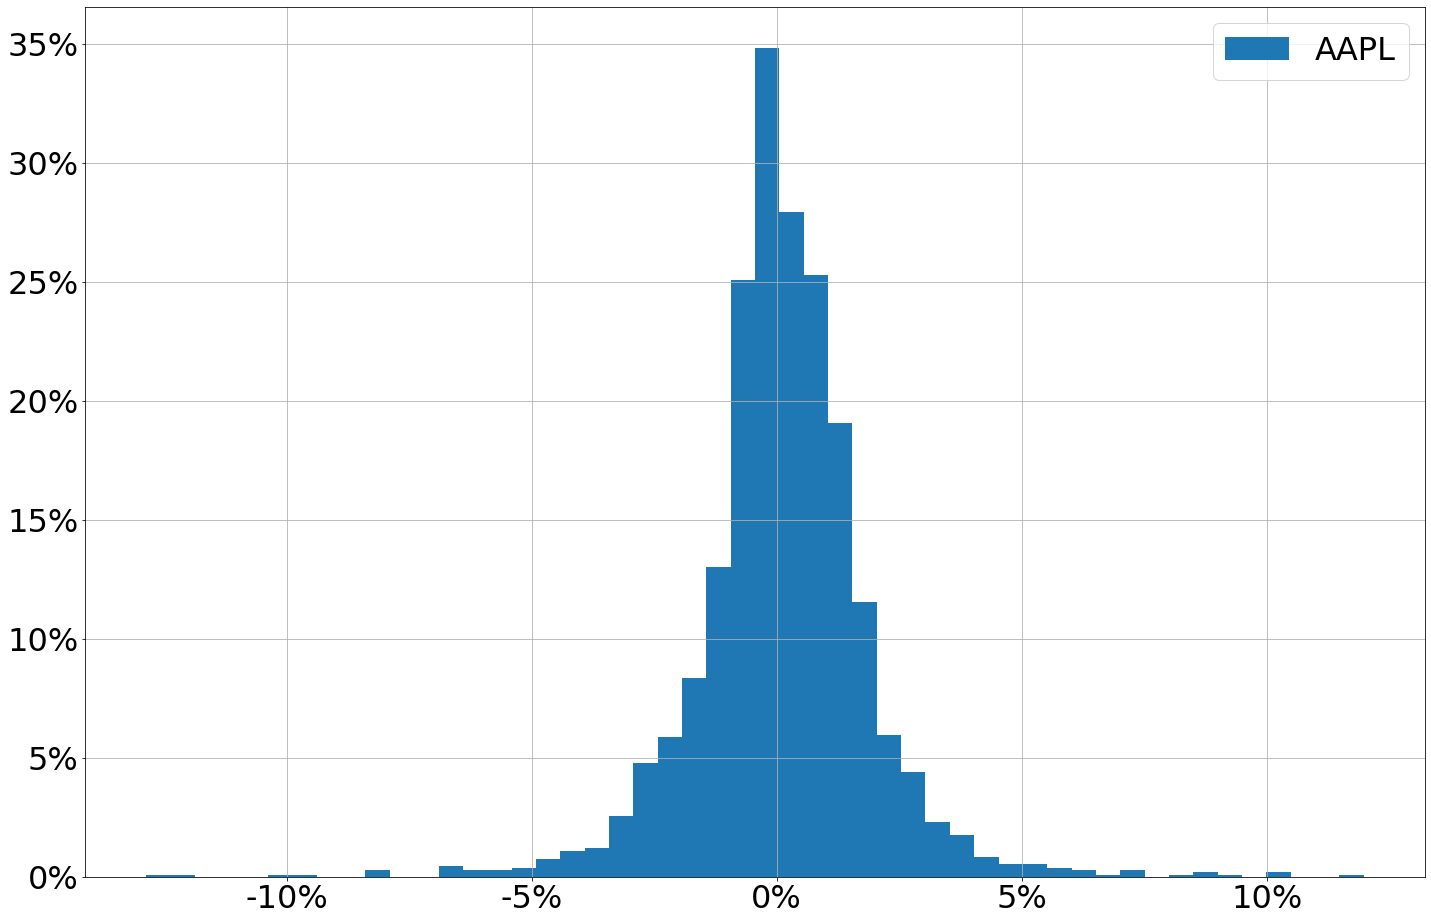

In [11]:
fig, ax = plt.subplots(figsize = (24, 16))
price_change_data["AAPL"].hist(bins = 50, label = "AAPL", density = True)
# set horizontal axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals]) 
# set vertical axis values as percent
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 

plt.legend()

It will be more interesting if we can compare distributions of these stocks. We can plot these giving each stock its own quadrant.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002DE47606B88>,
      dtype=object)

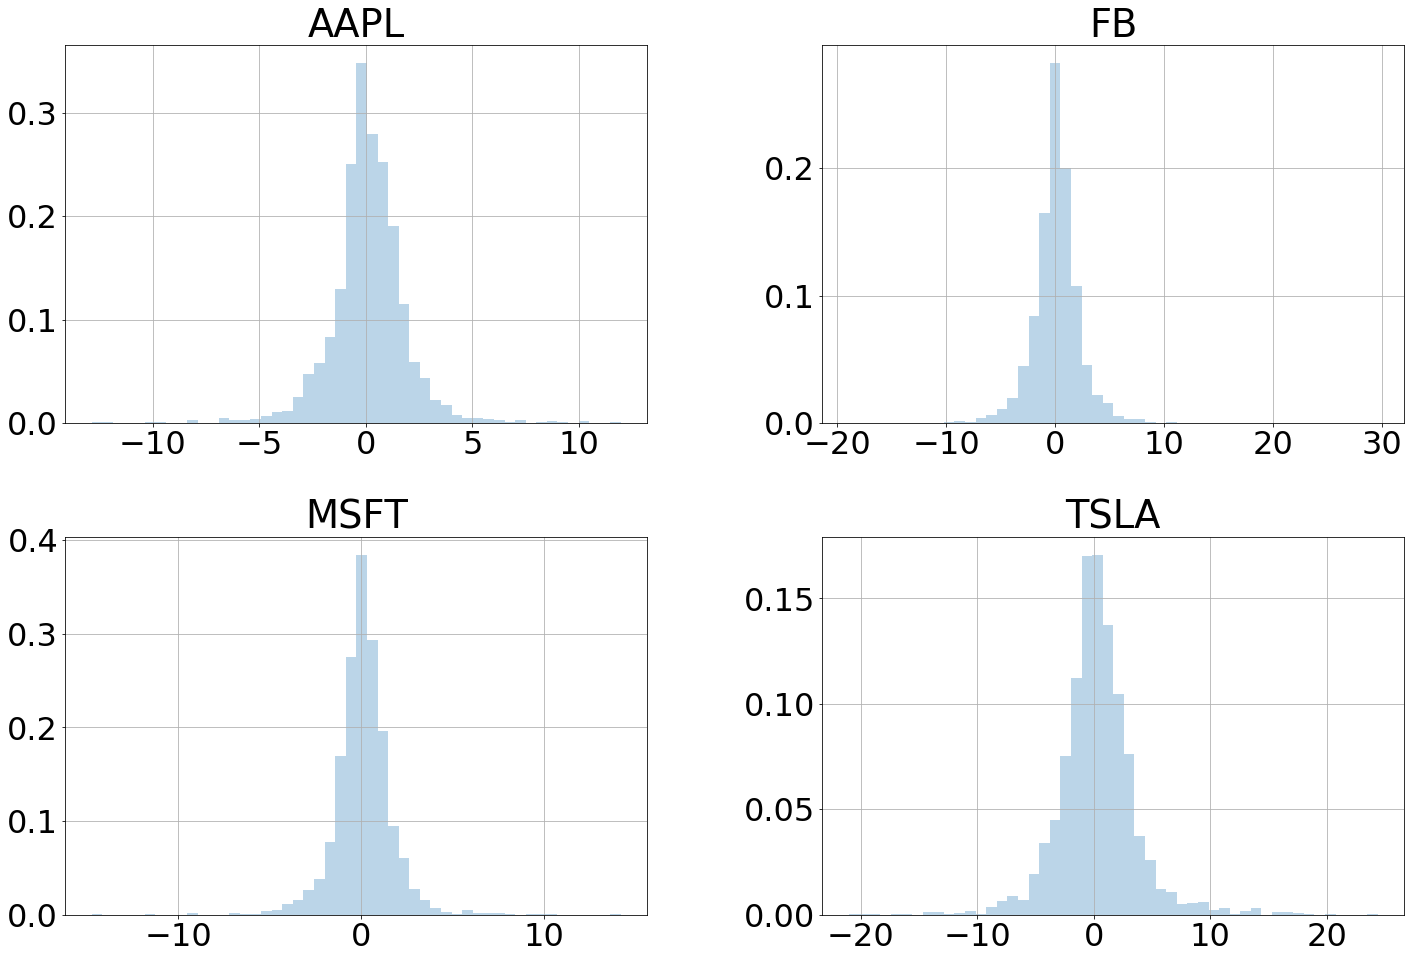

In [12]:
fig, ax = plt.subplots(2,2, figsize = (24,16))
#for key in price_change_data:
price_change_data.hist(bins = 50, alpha = .3, label = price_change_data.keys(), ax = ax, density = True)

Next, we will calculate statistics for each stock and include these statistics within the plot.

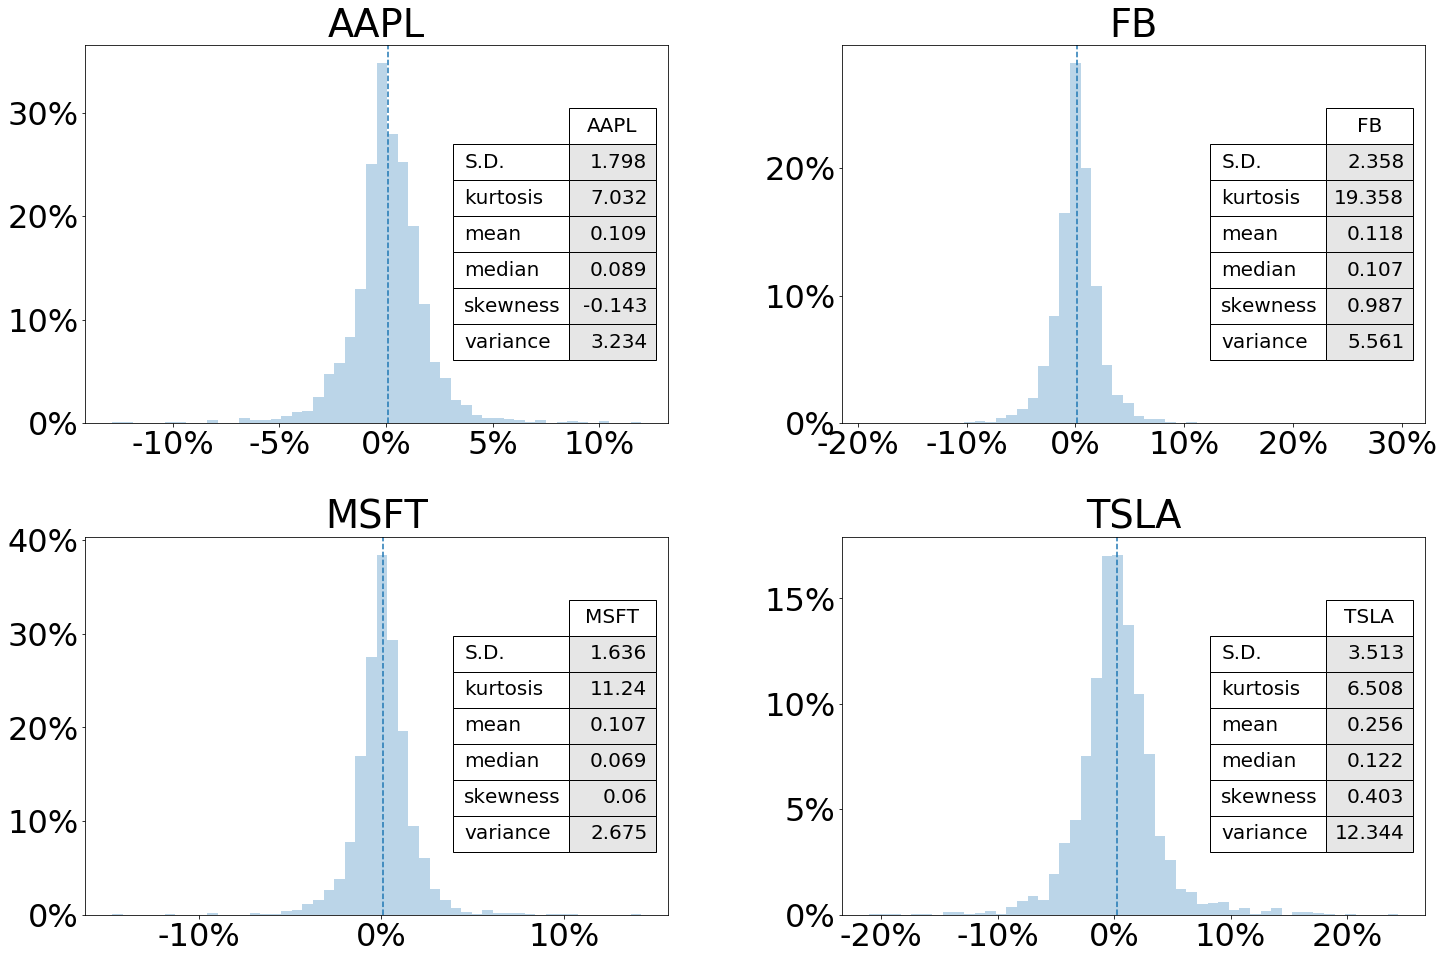

In [13]:
from pandas.plotting import table

fig, ax = plt.subplots(2,2, figsize = (24,16))
#for key in price_change_data:
price_change_data.hist(bins = 50, alpha = .3, label = price_change_data.keys(), ax = ax, density = True)

# plot table with summary statistics
for i in range(len(ax)):
    for j in range(len(ax[i])):
        # select hist plot for each stock
        a = ax[i][j]
        # identify stock
        stock = a.get_title()
        # save summary statistics data
        hist_data = stats_df[stock] 
        # plot summary statistics within the histogram plot
        stats =table(a, hist_data, colWidths=[.1], cellColours=[[(.9,.9,.9)]]*6, loc = "center right")
        stats.scale(1.5,3)
        stats.auto_set_font_size(False)
        stats.set_fontsize(20)
        # mark the mean
        a.axvline(x = hist_data.loc["mean"], ls="--")
        # set horizontal axis values as percent
        x_vals = a.get_xticks()
        a.set_xticklabels([str(int(x))+ "%" for x in x_vals])   
        y_vals = a.get_yticks()
        a.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 
        # Turn of grid lines
        a.grid(False)

   
plt.show()

Notice that kurtosis is actually the largest for Facebook, followed by Microsoft. This might seems strange since higher kurtosis values tend to indicate fatter tails for a distribution. So why is it that the tamest distribution in terms of the size of  standard deviation has the second highest kurtosis value? (Hint: look at the role of standard deviation in calculating kurtosis.)

For a more convenient comparison, we can also each histogram transparently on a single plot.

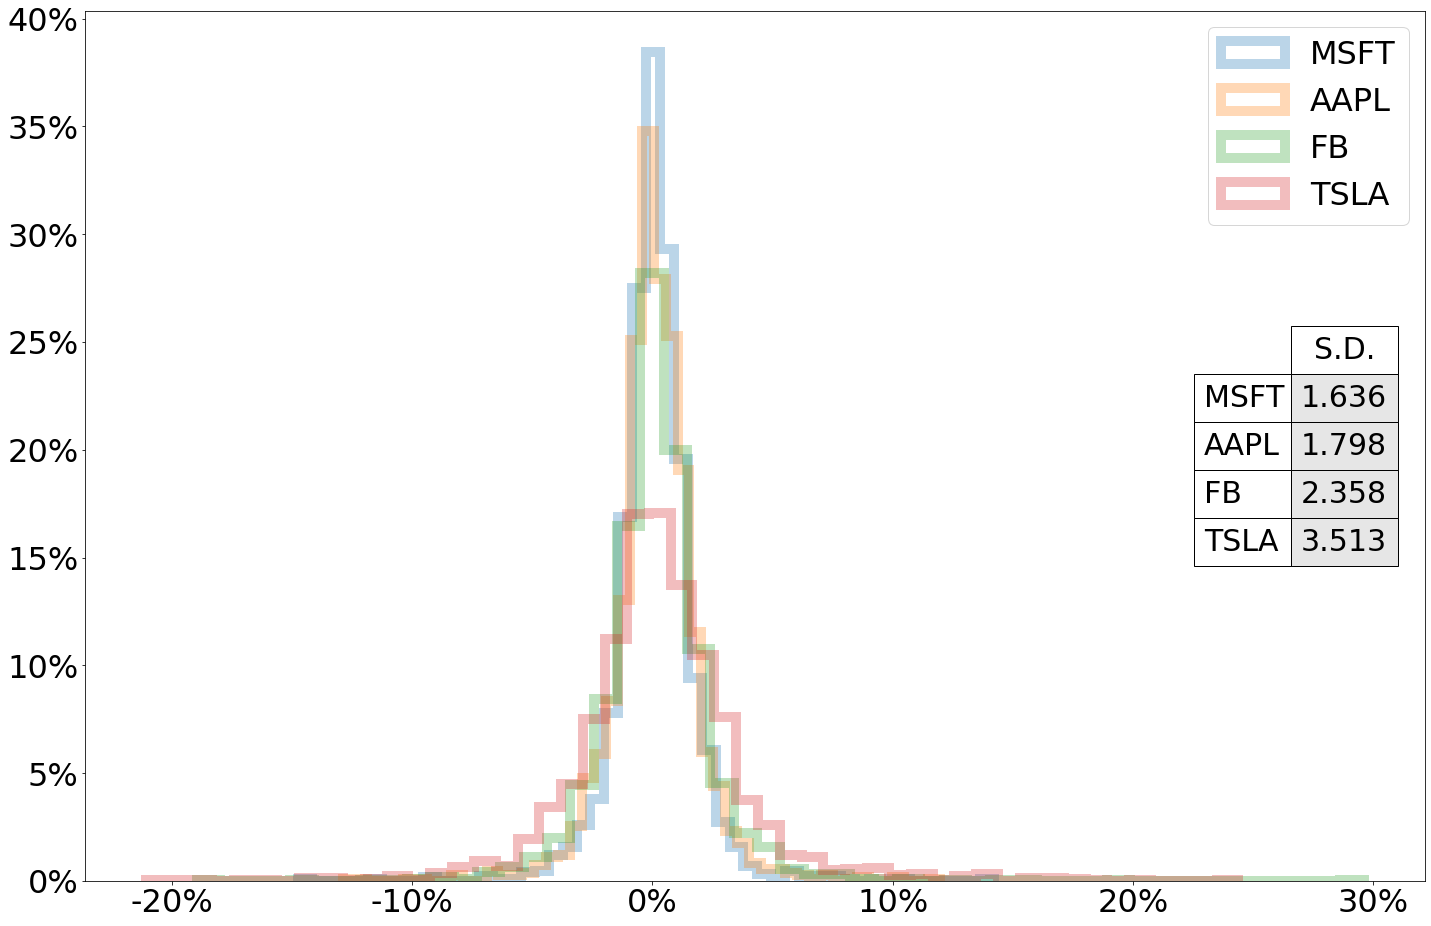

In [14]:
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    price_change_data[key].hist(bins = 50, histtype = "step", 
                                alpha = .3, label = key, linewidth = 10, 
                                density = True)
# set horizontal axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    
# set vertical axis values as percent
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 
# Include a table with the standard deviation of each stock
stats =table(ax, stats_df.loc["S.D."], colWidths=[.1], 
             cellColours=[[(.9,.9,.9)]]*4, loc = "center right")
stats.scale(.8,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.grid(False)

plt.legend()

If you prefer, you can fill the space below the curves to indicate the area under each curve. This makes it difficult to see the "AAPL", but it is especially useful if you would like to compare only 2 or 3 distributions.

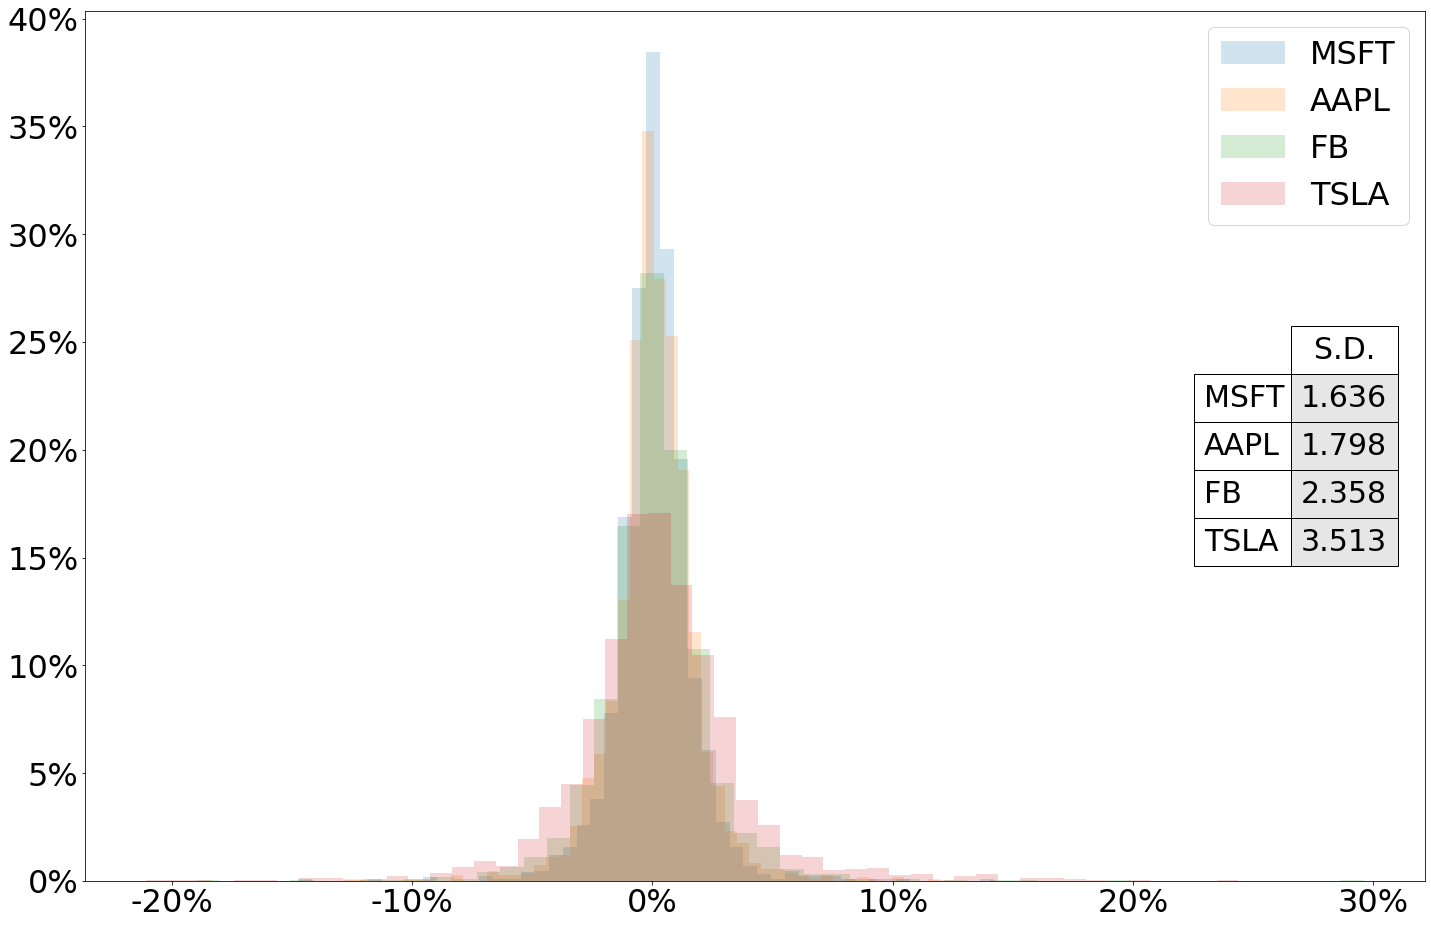

In [15]:
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    price_change_data[key].hist(bins = 50, alpha = .2, label = key, 
                                density = True)
# set horizontal axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    
# set vertical axis values as percent
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])
# Include a table with the standard deviation of each stock
stats =table(ax, stats_df.loc["S.D."], colWidths=[.1], cellColours=[[(.9,.9,.9)]]*4, loc = "center right")
stats.scale(.8,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.grid(False)

plt.legend()